# Optimizing Electric Vechile Charging Points Placement using Hybrid Quantum Genetic Algorithm

### Initialization

In [1]:
import utils
import classicalgeneticalgo as CGA
from tqdm import tqdm

In [41]:
population_size = 20
num_new_charging_points = 5
selection_size = 5
num_existing_charging_points = 5
num_points_of_interest = 10
num_of_qubits_for_one_point = 5

# Bounds of the search space
X_MIN, X_MAX = -15, 15
Y_MIN, Y_MAX = -15, 15

### Generating random population

In [42]:
'''existing_charging_points = utils.generate_random_coordinates(X_MIN, X_MAX, Y_MIN, Y_MAX, num_existing_charging_points)
points_of_interest = utils.generate_random_coordinates(X_MIN, X_MAX, Y_MIN, Y_MAX, num_points_of_interest)
'''
existing_charging_points = [(2.0426084522127255, 13.448555572317062),
 (3.7994835657456747, 3.9341118311727747),
 (14.58562967279343, 7.5764311807671305),
 (14.119597914030631, -2.789792346707735),
 (-1.9913174229900505, 3.0333436186101537)]

points_of_interest = [(10.98116648300358, -6.1428099826574325),
 (3.6219883182205415, 3.50559923067712),
 (1.09570576803117, -4.61503881327371),
 (-8.60649474958759, -6.883896364295067),
 (-4.528908476113271, 2.05738139389646),
 (-1.060832087976923, 13.83409228094158),
 (0.8138000533067515, -2.5736433472428626),
 (14.077628151207254, -4.753956561874016),
 (-13.656758434997847, 12.405625665793263),
 (5.925312669715176, -4.502212832673392)]
powergrids = [(0, 13), (-13, -2), (13, -2)]

### Dividing the population into different possible grids

Graph #: 1


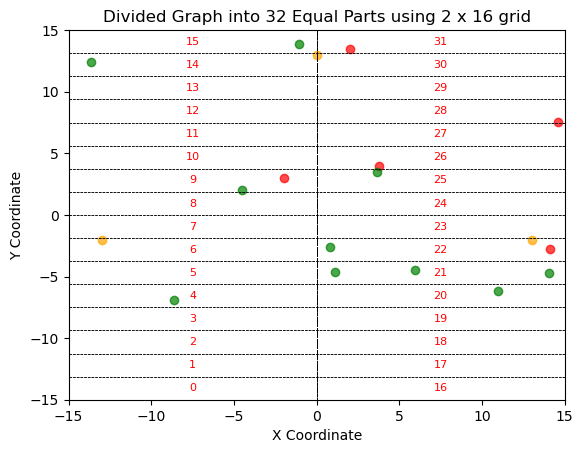

Graph #: 2


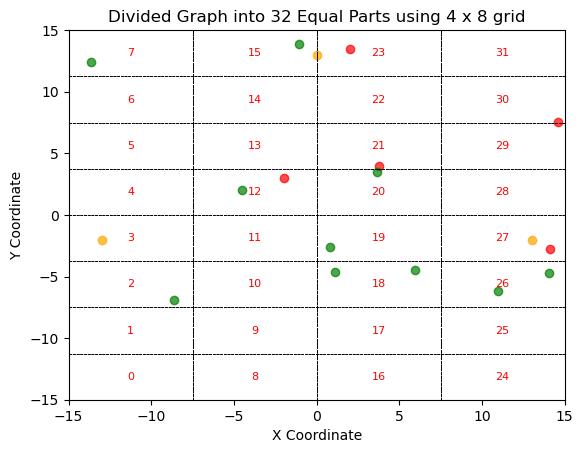

Graph #: 3


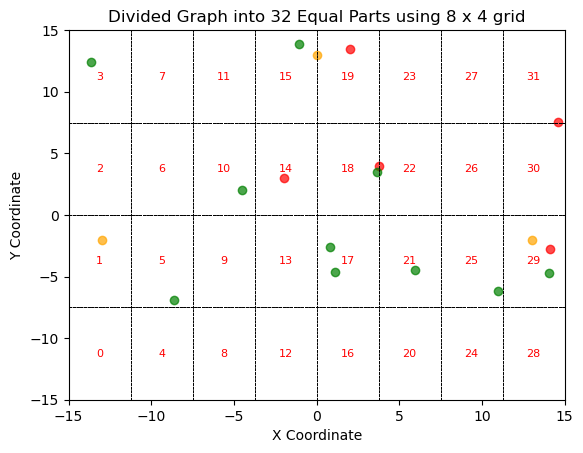

Graph #: 4


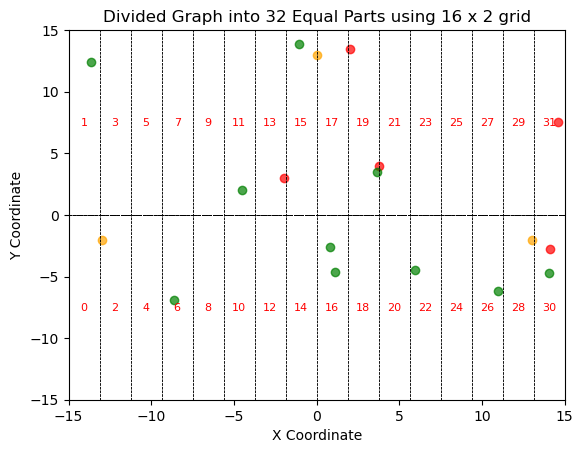

In [43]:
utils.check_possibilities(X_MIN, X_MAX, Y_MIN, Y_MAX, num_of_qubits_for_one_point, existing_charging_points, points_of_interest, powergrids)

### Selecting the best Gird

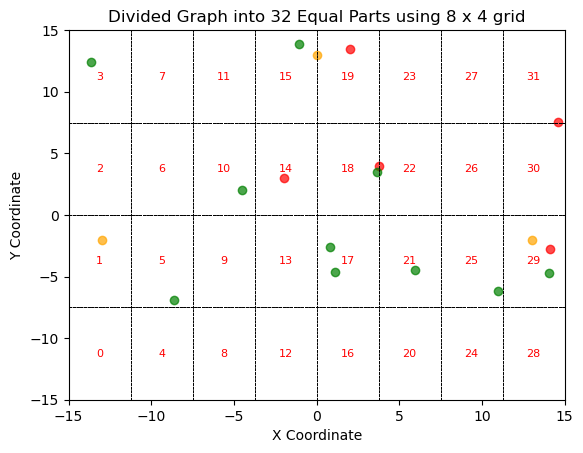

In [44]:
'''
The numbering starts from 1,2,3,..
'''
final_grid = 3
boundaries = {}

boundaries = utils.divide_graph_into_parts(X_MIN, X_MAX, Y_MIN, Y_MAX, num_of_qubits_for_one_point, existing_charging_points, points_of_interest, powergrids, final_grid, save_grids=True)

### Extracting useful information from thefinal plot

In [45]:
points_counts = utils.count_points_in_grids(existing_charging_points, points_of_interest, powergrids, boundaries)

utils.display_boundaries_table(boundaries, points_counts)

+-------------+---------+--------+---------+-------+--------------------------------+--------------------------+--------------------+-------------+
| Grid Number | X Start | X End  | Y Start | Y End |         Adjacent Pairs         | Existing Charging Points | Points of Interest | Power Grids |
+-------------+---------+--------+---------+-------+--------------------------------+--------------------------+--------------------+-------------+
|      0      |  -15.0  | -11.25 |  -15.0  |  -7.5 |            1, 4, 5             |            0             |         0          |      0      |
|      1      |  -15.0  | -11.25 |   -7.5  |  0.0  |         0, 2, 4, 5, 6          |            0             |         0          |      1      |
|      2      |  -15.0  | -11.25 |   0.0   |  7.5  |         1, 3, 5, 6, 7          |            0             |         0          |      0      |
|      3      |  -15.0  | -11.25 |   7.5   |  15.0 |            2, 6, 7             |            0             |

In [46]:
fitness_dict = utils.create_fitness_dict(boundaries, points_counts)

# utils.display_fitness_table(fitness_dict)

### Generating population

In [47]:
population_space = [i for i in range(2**num_of_qubits_for_one_point)]

print("Ppopulation space:")
print(population_space)

Ppopulation space:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [48]:
Generation = CGA.classical_population_generator(population_space, population_size, num_new_charging_points)

print(Generation)

[[30, 22, 24, 26, 19], [15, 8, 1, 25, 7], [19, 16, 5, 11, 29], [18, 24, 11, 5, 16], [3, 26, 21, 24, 8], [21, 27, 13, 11, 15], [20, 24, 7, 27, 5], [19, 8, 30, 16, 0], [15, 19, 12, 10, 27], [12, 1, 3, 18, 8], [27, 17, 1, 0, 3], [12, 21, 30, 18, 11], [12, 11, 29, 18, 1], [19, 7, 16, 30, 26], [29, 1, 24, 6, 10], [29, 14, 10, 31, 22], [15, 16, 29, 31, 28], [18, 19, 4, 26, 17], [9, 2, 10, 21, 14], [0, 4, 2, 17, 8]]


### Fitness function

In [49]:
top_population = CGA.classical_select_top_population(Generation, fitness_dict)

print("Top 5 individuals:", top_population)

Top 5 individuals: [[15, 8, 1, 25, 7], [19, 16, 5, 11, 29], [18, 24, 11, 5, 16], [12, 11, 29, 18, 1], [19, 8, 30, 16, 0]]


### Genetic Algorithm - Iteration

In [50]:
import random
from tqdm import tqdm

def classical_genetic_algorithm(Generation, fitness_dict, num_of_qubits_for_one_point):
    total_iterations = 1000
    for _ in tqdm(range(total_iterations), desc="Generations"):
        top_population = CGA.classical_select_top_population(Generation, fitness_dict)
        generations = []
        
        for _ in range(len(top_population)):
            parent_1 = random.choice(top_population)
            parent_2 = random.choice(top_population)
            
            child_1, child_2 = CGA.classical_crossover(parent_1, parent_2)

            child_1 = CGA.classical_mutation(child_1, population_space, parent_1, parent_2)
            child_2 = CGA.classical_mutation(child_2, population_space, parent_1, parent_2)

            generations.append(child_1)
            generations.append(child_2)

        Generation = generations

    final_set = CGA.classical_select_top_population(Generation, fitness_dict)
    return final_set

# Usage
Possible_Coordinates_classical = classical_genetic_algorithm(Generation, fitness_dict, num_of_qubits_for_one_point)


Generations: 100%|███████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2518.90it/s]


### Final Results

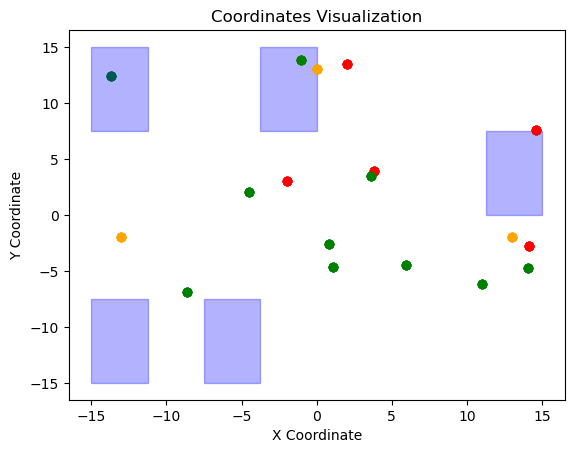

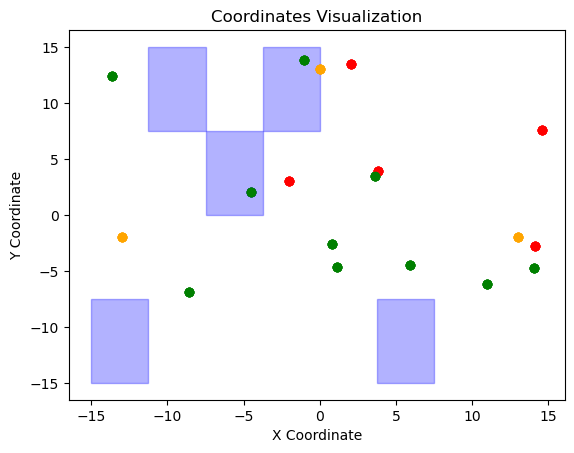

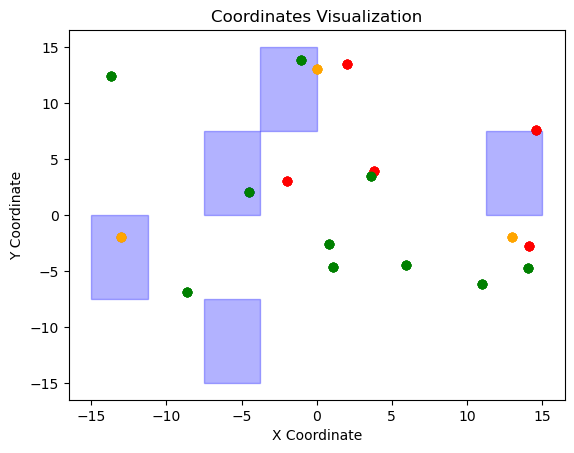

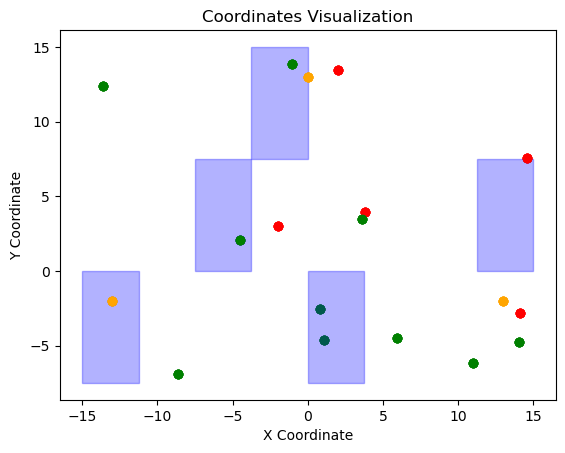

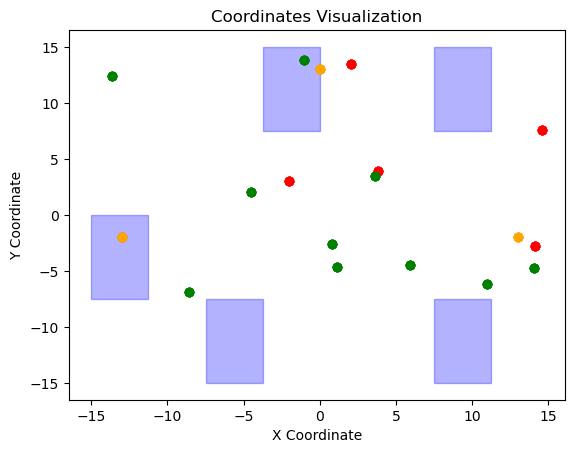

In [51]:
import matplotlib.pyplot as plt


# Plot the new areas from final_set
for _ in Possible_Coordinates_classical:
    for i in (_):
        charging_x, charging_y = zip(*existing_charging_points)
        interest_x, interest_y = zip(*points_of_interest)
        power_x, power_y = zip(*powergrids)

        plt.scatter(charging_x, charging_y, color='red', label='Charging Points')
        plt.scatter(interest_x, interest_y, color='green', label='Points of Interest')
        plt.scatter(power_x, power_y, color='orange', label='Power Grids')
        x_start, x_end, y_start, y_end = boundaries[i]['x_start'], boundaries[i]['x_end'], boundaries[i]['y_start'], boundaries[i]['y_end']
        width = x_end - x_start
        height = y_end - y_start
        rect = plt.Rectangle((x_start, y_start), width, height, alpha=0.3, color='blue')
        plt.gca().add_patch(rect)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Coordinates Visualization')

    #plt.legend()

    plt.show()


In [52]:
existing_charging_points

[(2.0426084522127255, 13.448555572317062),
 (3.7994835657456747, 3.9341118311727747),
 (14.58562967279343, 7.5764311807671305),
 (14.119597914030631, -2.789792346707735),
 (-1.9913174229900505, 3.0333436186101537)]

In [53]:
points_of_interest

[(10.98116648300358, -6.1428099826574325),
 (3.6219883182205415, 3.50559923067712),
 (1.09570576803117, -4.61503881327371),
 (-8.60649474958759, -6.883896364295067),
 (-4.528908476113271, 2.05738139389646),
 (-1.060832087976923, 13.83409228094158),
 (0.8138000533067515, -2.5736433472428626),
 (14.077628151207254, -4.753956561874016),
 (-13.656758434997847, 12.405625665793263),
 (5.925312669715176, -4.502212832673392)]